# Task 1 - Data Import and Basic Procress

## DataSet_1

### Import and Clean

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns# we import this for Gaussian-kernel-density estimation, majorly for descriptive statistical analysis
from google.colab import drive
drive.mount('/content/gdrive')
# import some necessary modules

Mounted at /content/gdrive


In [ ]:
ds1_df = pd.read_csv('/content/gdrive/MyDrive/ASG1_COMP551/ds1/NHANES_age_prediction.csv')
# the data has been imported according to the file extension and the seperation
# they have been turned into DataFrame objects for further analysis

In [ ]:
ds1_df.head() # lets regard the first data set

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [ ]:
ds1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


This brief summary of our dataset_1 indicates one fact, that's there's no missing values in that. Besides, there's no ill-formed values since there's no string or other type of Dtype. However, we still face the situation of duplication and want a clear description of the variables.


Let's first check(and deal with) if there's any duplication.

In [ ]:
ds1_df.drop_duplicates(inplace=True)
ds1_df.shape

(2278, 10)

The result indicates no duplication is involved since the number of rows(examples) does not change, which means no duplicate is removed.

Now, after that, according to the source, we may have the explanation for the data names, as which follows:

In [ ]:
datas_1_desctiption = {
    "Variable Name": ["SEQN", "age_group", "RIDAGEYR", "RIAGENDR", "PAQ605", "BMXBMI", "LBXGLU", "DIQ010", "LBXGLT", "LBXIN"],
    "Role": ["ID", "Target", "Other", "Feature", "Feature", "Feature", "Feature", "Feature", "Feature", "Feature"],
    "Type": ["Continuous", "Categorical", "Continuous", "Continuous", "Continuous", "Continuous", "Continuous", "Continuous", "Continuous", "Continuous"],
    "Demographic": ["", "Age", "Age", "Gender", "", "", "", "", "", ""],
    "Description": ["Respondent Sequence Number", "Respondent's Age Group (senior/non-senior)", "Respondent's Age", "Respondent's Gender", "Engages in moderate/vigorous sports, fitness, recreational activities", "Respondent's Body Mass Index", "Respondent's Blood Glucose after fasting", "Respondent is diabetic", "Respondent's Oral", "Respondent's Blood Insulin Levels"],
    "Units": ["", "", "", "", "", "", "", "", "", ""],
    "Missing Values": ["no", "no", "no", "no", "no", "no", "no", "no", "no", "no"]
}
df = pd.DataFrame(datas_1_desctiption)
df


,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,SEQN,ID,Continuous,,Respondent Sequence Number,,no
1,age_group,Target,Categorical,Age,Respondent's Age Group (senior/non-senior),,no
2,RIDAGEYR,Other,Continuous,Age,Respondent's Age,,no
3,RIAGENDR,Feature,Continuous,Gender,Respondent's Gender,,no
4,PAQ605,Feature,Continuous,,"Engages in moderate/vigorous sports, fitness, ...",,no
5,BMXBMI,Feature,Continuous,,Respondent's Body Mass Index,,no
6,LBXGLU,Feature,Continuous,,Respondent's Blood Glucose after fasting,,no
7,DIQ010,Feature,Continuous,,Respondent is diabetic,,no
8,LBXGLT,Feature,Continuous,,Respondent's Oral,,no
9,LBXIN,Feature,Continuous,,Respondent's Blood Insulin Levels,,no


Let's only pay attention to the role and description of each variable, ignoring the other coloums including Missing Values. We can see that this actually justifies using SEQN as our index according to its desctiprion. Thus, we rectify our `index_col` setting. Since SEQN should be regard as the index and it's recorded in ID(a numeric sequence), we consider use `int64` or `string` to represent it.

 Besides, we noticed that the some variables that batter to have `int64` type are classified with the `float64` type, we can do a simple conversion to gurantee the significance.

In [ ]:
ds1_df[['SEQN','RIDAGEYR','RIAGENDR']] = ds1_df[['SEQN','RIDAGEYR','RIAGENDR']].astype(int)
ds1_df.set_index('SEQN',inplace = True)
ds1_df.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
SEQN,,,,,,,,,
73564,Adult,61,2,2.0,35.7,110.0,2.0,150.0,14.91
73568,Adult,26,2,2.0,20.3,89.0,2.0,80.0,3.85
73576,Adult,16,1,2.0,23.2,89.0,2.0,68.0,6.14
73577,Adult,32,1,2.0,28.9,104.0,2.0,84.0,16.15
73580,Adult,38,2,1.0,35.9,103.0,2.0,81.0,10.92


### Descriptive Statistical Analysis

Entering into the area of descriptive analysis, to adhere to the requirement, we first do a bi-classification according to our acquired data (to find the label or the target variable). The description offered by the publisher indicates to use indicator of age as the classification criterion:
<ul>...<u>In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset.</u>...</ul>

In [ ]:
ds1_df['age_group'].describe()

count      2278
unique        2
top       Adult
freq       1914
Name: age_group, dtype: object

In [ ]:
ds1_df['age_group'].value_counts()

Adult     1914
Senior     364
Name: age_group, dtype: int64

The above description of the variable `age_group` indicates that bi-classification is admissible since it has 2 possible values: `Adult`,`Senior`.

After pinning down our label, we can further carry on our analysis with a crystal purpose: finding the feature that mostly implies the age.

We first do some general statistical description.
Let's quantitize the categorical variable to (0,1) variable for the sake of mathematical convenience:

In [ ]:
ds1_df['age_group']= ds1_df['age_group'].map({'Adult': 1, 'Senior': 0})

In [ ]:
ds1_df.describe()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,0.840211,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,0.366491,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,0.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,1.000000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,1.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,1.000000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,1.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


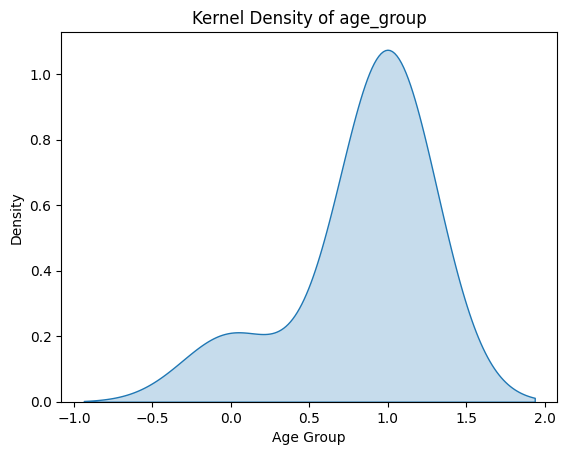

In [ ]:
sns.kdeplot(ds1_df['age_group'],fill= True,bw_adjust = 4) # use kde for intuitive visualization - use gaussian kernel since its more smooth

plt.title('Kernel Density of age_group')
plt.xlabel('Age Group')
plt.ylabel('Density')

plt.show()

The interpretation of the statistics of `age_group` is very intuitive.
1. Central Tendency:
* The mapping $\{Adult ↦ 1 , Senior \mapsto 0\}$ indicates closer the mean is to 1, more adults the sample contains. In here, the mean is 0.840211, means the sample is majorly composed of adults, indicating imbalance of the data; we can visualize this by forming a left-skewd distribution (by Gaussian-kernel in non-parametric estimation with bandwidth = 5). This suggests to use the performance measure which can deal with the inbalance as evaluating the model (or learning method) - (for example, if we choose between PR and ROC, we should weight more on PR).
2. Volatilty (Degree of Deviation):
* std = 0.366491 indicates large volativity, means the age variable itself can varys moderately. In here, the volatile analysis has unclear significance. However, it can somewhat reflects the severity of imbalance. The imbalance is not very serious, we may still learn the universal factor of `Senior` in our dataset.

### Feature Analysis - Dynamics between feature and label

The purpose of our statistical analysis of the dataset ought to benefit our model selection and learning process. Therefore, we need to check the dynamics between feature and label to acquire some enlightment.

Previous analysis has provided us with some information. Now let's dig deeper.

First, `age_group` can be decomposed into `Adult - 1` and `Senior - 0`. let's have a deeper comprehension about that respectively.


In [ ]:
# for senior group
ds1_age_senior = ds1_df[ds1_df["age_group"] == 0]
ds1_age_senior.describe()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,364.0,364.000000,364.000000,364.000000,364.000000,364.00000,364.000000,364.000000,364.000000
mean,0.0,73.425824,1.508242,1.909341,27.886264,104.32967,2.027473,141.208791,10.405247
std,0.0,5.415771,0.500620,0.287519,5.574166,14.96667,0.266211,51.549440,7.530538
min,0.0,65.000000,1.000000,1.000000,16.800000,80.00000,1.000000,48.000000,1.020000
25%,0.0,68.750000,1.000000,2.000000,24.200000,95.00000,2.000000,104.000000,5.247500
50%,0.0,73.000000,2.000000,2.000000,27.200000,101.00000,2.000000,131.000000,8.465000
75%,0.0,80.000000,2.000000,2.000000,30.600000,111.00000,2.000000,166.250000,13.212500
max,0.0,80.000000,2.000000,2.000000,52.200000,208.00000,3.000000,346.000000,52.890000


In [ ]:
# for adult group
ds1_age_adult = ds1_df[ds1_df["age_group"] == 1]
ds1_age_adult.describe()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,1914.0,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,1.0,35.780564,1.512017,1.806165,27.968286,98.644723,2.014107,109.990596,12.106661
std,0.0,15.856878,0.499986,0.414761,7.526555,18.255726,0.165850,44.453655,10.060040
min,1.0,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,1.0,21.000000,1.000000,2.000000,22.600000,91.000000,2.000000,84.000000,5.982500
50%,1.0,35.500000,2.000000,2.000000,26.750000,96.000000,2.000000,101.000000,9.200000
75%,1.0,50.000000,2.000000,2.000000,31.400000,103.000000,2.000000,124.000000,14.790000
max,1.0,64.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


###### Violin Graph - Distributive Structure, Median and Outlier Analysis

 Analysis is not done for its own sake; our analysis shall always serve a specific purpose. In this case, our aim is to observe the characteristics of different age groups. This suggests two things to us: 1. We need to compare the same features across different age groups. 2. This comparison should be intuitive and sufficient to reflect and illustrate the situation.

 Observing the data above, notice that outliers exist in most features. Since standard deviation and variance can be greatly impacted by the outliers, to deal the data more sensibly without messing it too much, we first consider to use IQR for measure of volatility. The same, we use median to represent central tendency.

 We need the comparison in both volatility and central tendency, without loosing too much details. Violin graph may be our best choice.

<ipython-input-16-84312c84e633>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name,data in ds1_age_adult.iteritems():
<ipython-input-16-84312c84e633>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _,data in ds1_age_senior.iteritems():


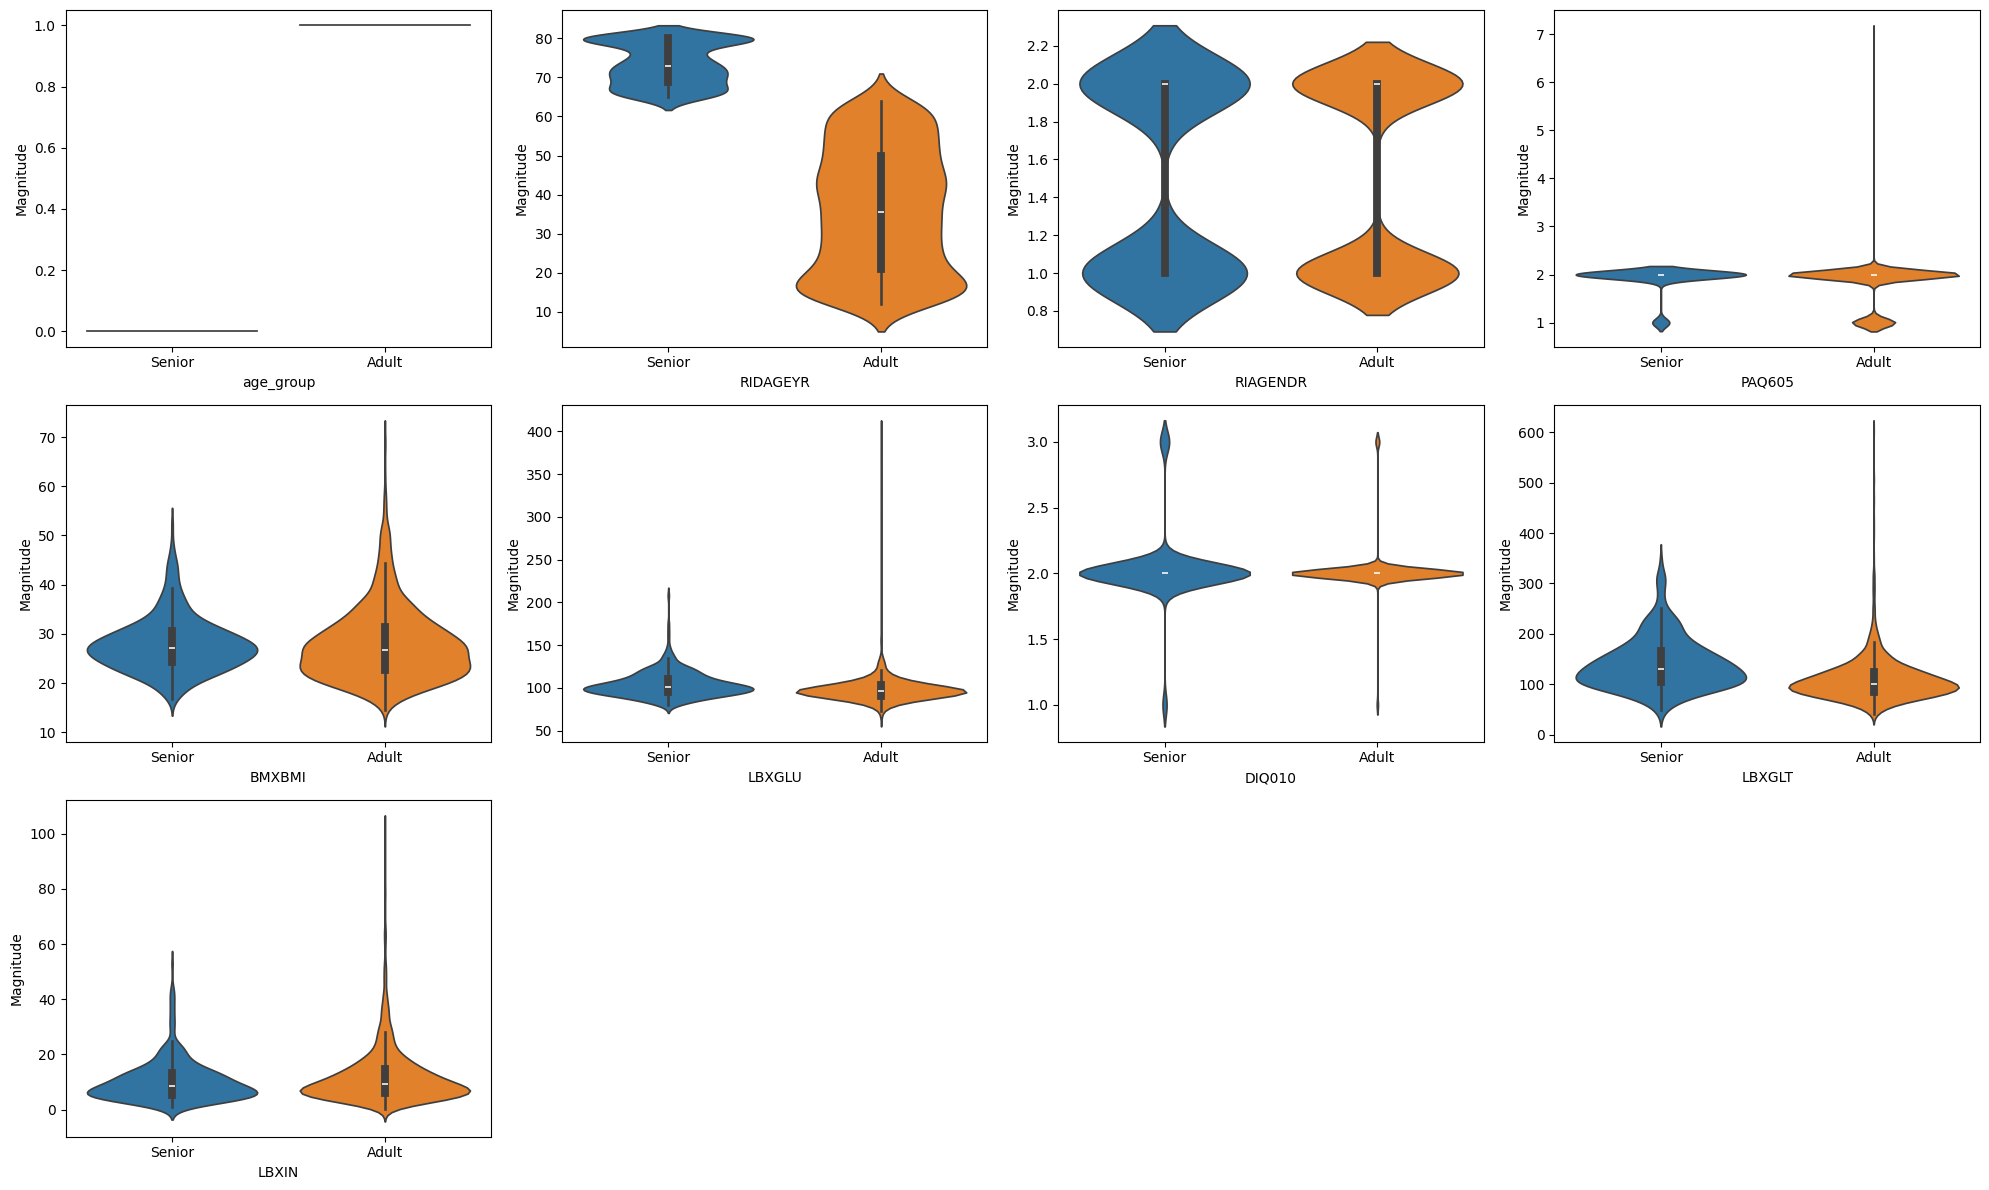

In [ ]:
feature_name_adult = list()
feature_data_adult = list()
#feature_name_senior = list()
feature_data_senior = list()
label = ["Senior", "Adult"]

for column_name,data in ds1_age_adult.iteritems():
  feature_name_adult.append(column_name)
  feature_data_adult.append(data)

for _,data in ds1_age_senior.iteritems():
  #feature_name_senior.append(column_name)
  feature_data_senior.append(data)

# calculate the column and row numbers
cols = 4  # 4 columns
rows = math.ceil(len(feature_name_adult) / cols)

# figure size setting
plt.figure(figsize=(20, 4 * rows))  # dynamic height

# iterate
for i, column_name in enumerate(feature_name_adult):
    plt.subplot(rows, cols, i + 1)  # subgraph creation
    sns.violinplot(data=[list(feature_data_senior[i]), list(feature_data_adult[i])])
    plt.xlabel(column_name)
    plt.ylabel("Magnitude")
    plt.xticks(ticks=[0, 1], labels=label)

# adjustment
plt.tight_layout()
plt.show()

Many graphs indicate the feature distribution of the adult tends to have more outliers compared to the senior.

One interpretation would be higher age increase the probability of having more outliers. This seems reasonable but we still need to testify this.

First, let's assume this interpretation holds.
Since the size of two age groups is imbalanced, we need to calculate the proportion of the outliers in each group and then do the comparison.

In [ ]:
def find_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (data < lower_bound) | (data > upper_bound)

# Outlier description
outlier_counts_adult = ds1_age_adult.apply(find_outliers).sum()/len(ds1_age_adult)
outlier_counts_senior = ds1_age_senior.apply(find_outliers).sum()/len(ds1_age_senior)

print("Outlier description of Adult: \n", outlier_counts_adult)
print("---")
print("Outlier description of Senior: \n", outlier_counts_senior)




Outlier description of Adult: 
 age_group    0.000000
RIDAGEYR     0.000000
RIAGENDR     0.000000
PAQ605       0.196970
BMXBMI       0.040752
LBXGLU       0.040752
DIQ010       0.027691
LBXGLT       0.043887
LBXIN        0.066876
dtype: float64
---
Outlier description of Senior: 
 age_group    0.000000
RIDAGEYR     0.000000
RIAGENDR     0.000000
PAQ605       0.090659
BMXBMI       0.041209
LBXGLU       0.032967
DIQ010       0.071429
LBXGLT       0.032967
LBXIN        0.038462
dtype: float64


In [ ]:
print("Outlier proportion difference: \n", outlier_counts_adult - outlier_counts_senior)

Outlier proportion difference: 
 age_group    0.000000
RIDAGEYR     0.000000
RIAGENDR     0.000000
PAQ605       0.106310
BMXBMI      -0.000456
LBXGLU       0.007785
DIQ010      -0.043738
LBXGLT       0.010920
LBXIN        0.028414
dtype: float64


The result indicates the assumption is reasonable since there's difference, and we can use hypothesis testing to show it's not caused by variation. It emphasize that use mean to do the analysis has some sense and we should focus more on `PAQ605`, `DIQ010`,`LBXGLT`, and `LBXIN`.

###### Mean and Volatility in Variance

The previous discussion justify the reasonbility for using mean and variance for further analysis. In here, we carry this out, but we ignore the $n-1$ - freedom of degree term here since it merely constitutes a scaling factor.

First, we calculate the means of the features for different group then take the eucledian distance(the variance without scaling factor $n-1$).

In [ ]:
ds1_age_senior.describe().loc["mean"]

age_group      0.000000
RIDAGEYR      73.425824
RIAGENDR       1.508242
PAQ605         1.909341
BMXBMI        27.886264
LBXGLU       104.329670
DIQ010         2.027473
LBXGLT       141.208791
LBXIN         10.405247
Name: mean, dtype: float64

In [ ]:
ds1_age_adult.describe().loc["mean"]

age_group      1.000000
RIDAGEYR      35.780564
RIAGENDR       1.512017
PAQ605         1.806165
BMXBMI        27.968286
LBXGLU        98.644723
DIQ010         2.014107
LBXGLT       109.990596
LBXIN         12.106661
Name: mean, dtype: float64

In [ ]:
ds1_sqm_diff = (ds1_age_adult.describe().loc["mean"] - ds1_age_senior.describe().loc["mean"]).apply(lambda x : x**2)
ds1_sqm_diff

age_group       1.000000
RIDAGEYR     1417.165594
RIAGENDR        0.000014
PAQ605          0.010645
BMXBMI          0.006728
LBXGLU         32.318625
DIQ010          0.000179
LBXGLT        974.575736
LBXIN           2.894810
Name: mean, dtype: float64

Here's the squared difference of the group means. Let's rank it for intuitiveness and readibility. Besides, since `RIDAGEYR` is not considered in the input feature and `age_group` itself is the label, let's get rid of them.

In [ ]:
ds1_sqm_diff.drop(["age_group","RIDAGEYR"]).rank(ascending = False)

RIAGENDR    7.0
PAQ605      4.0
BMXBMI      5.0
LBXGLU      2.0
DIQ010      6.0
LBXGLT      1.0
LBXIN       3.0
Name: mean, dtype: float64

The intuition behind this is higher rank tends to imply higher impact on classification, suggesting we should focus more on it. We can see this almost corresponds to our previous analysis that we should focus more on `PAQ605`, `DIQ010`,`LBXGLT`, and `LBXIN`.

However, this Mean Difference analysis suggests we should also include `LBXGLU` and `BMXBMI`.

In fact, the discrepancy originates from the principle behind how we viewing the impact. The outlier analysis emphasize more on the frequency of the outliers but the squared mean anlysis emphasize also include the deviation other than the outliers.

#### Further Analysis in the Dynamics between Feature and Label

Let's finally use HeatMap to do the final check and to decide which features we should use.


age_group    1.000000
RIDAGEYR    -0.684490
RIAGENDR     0.002767
PAQ605      -0.094789
BMXBMI       0.004147
LBXGLU      -0.116462
DIQ010      -0.026399
LBXGLT      -0.243113
LBXIN        0.064159
Name: age_group, dtype: float64


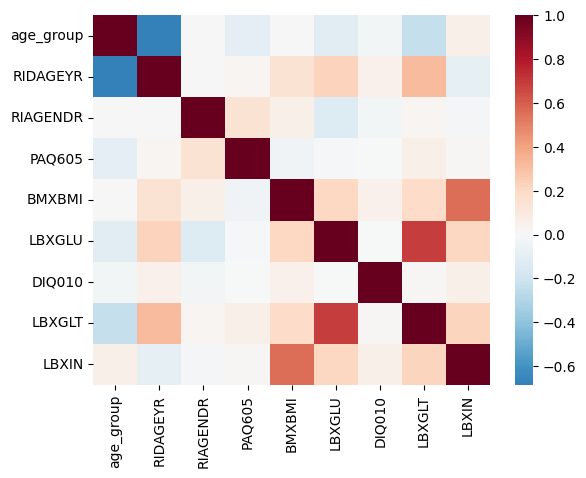

In [ ]:
sns.heatmap(ds1_df.corr(),cmap="RdBu_r",center = 0)
print(ds1_df.corr()['age_group'])

Let's accumulate the results before:

* Outlier Analysis:
`PAQ605`, `DIQ010`,`LBXGLT`, `LBXIN` should be considered as the input features. In spite of `DIQ10`, other outliers majorly accumulates in one end of the distribution(suggesting outlier analysis is reasonable).

* Squared Mean Difference(SMD):
`LBXGLU` and `BMXBMI` should also be considered as the input features. Besides, `DIQ010` should be removed since it's worse than `BMXBMI`by the standard of SMD.

The heat map provides us with the following information:
1. `PAQ65`, `LBXGLU`,`LBXGLT`,`LBXIN` has higher correlation to `age_group` compared to other indicators
2. `LBXGLT` and `LBXGLU` has high positive-correlation
3. `LBXIN` and `BMXBMI` has moderate positive-correlation
4. `LBXGLT` and `RIDAGEYR` has observable correlation

The correlation between  `LBXGLT` and `LBXGLU` indicates there's information overlapping between these two variables and the correlation is significant. Thus, we can use only one of them as the input feature. Since `LBXGLT` is recommended by the utlier analysis, we use `LBXGLT`. The observation of correlation between `LBXGLT` and `RIDAGEYR` also supports our decision.

The same logic also applies to `LBXIN` and `BMXBMI`. However, since the correlation between them is not strong enough, we use them both.

`DIQ010` may shows a relatively large variation by outlier-measure, however, no strong correlation is revealed. Thus, we decide to discard it.

The final selection of the input feature would thus be: `PAQ65`,`LBXGLT`,`LBXIN`,`BMXBMI`.



In [ ]:
ds1 = ds1_df[['age_group','PAQ605','LBXGLT','LBXIN','BMXBMI']]
ds1.to_csv('/content/gdrive/MyDrive/ASG1_COMP551/ds1/ds1.csv', index=False)

## DataSet_2

We follow the same principle of importing, cleaning, and analyzing dataset_1. Next cell prints the variable description of the dataset.

In [ ]:
data = {
    'Variable Name': ['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size',
                      'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size',
                      'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class'],
    'Role': ['ID', 'Feature', 'Feature', 'Feature', 'Feature', 'Feature', 'Feature', 'Feature', 'Feature', 'Feature', 'Target'],
    'Type': ['Categorical', 'Integer', 'Integer', 'Integer', 'Integer', 'Integer', 'Integer', 'Integer', 'Integer', 'Integer', 'Binary'],
    'Demographic': ['', '', '', '', '', '', '', '', '', '', ''],
    'Description': ['', '', '', '', '', '', '', '', '', '', '2 = benign, 4 = malignant'],
    'Units': ['', '', '', '', '', '', '', '', '', '', ''],
    'Missing Values': ['no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no']
}
pd.DataFrame(data)

,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,Sample_code_number,ID,Categorical,,,,no
1,Clump_thickness,Feature,Integer,,,,no
2,Uniformity_of_cell_size,Feature,Integer,,,,no
3,Uniformity_of_cell_shape,Feature,Integer,,,,no
4,Marginal_adhesion,Feature,Integer,,,,no
5,Single_epithelial_cell_size,Feature,Integer,,,,no
6,Bare_nuclei,Feature,Integer,,,,yes
7,Bland_chromatin,Feature,Integer,,,,no
8,Normal_nucleoli,Feature,Integer,,,,no
9,Mitoses,Feature,Integer,,,,no


### Import and Clean


In [ ]:
ds2_df = pd.read_csv('/content/gdrive/MyDrive/ASG1_COMP551/ds2/breast-cancer-wisconsin.data',sep = ',')
ds2_df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


This indicates dataset_2 starts does not inherently contain the column names. Thus, by referring to other files contained in the data group and the website offering it, we rectify that. Besides, we also set the index manually.

In [ ]:
ds2_df = pd.read_csv('/content/gdrive/MyDrive/ASG1_COMP551/ds2/breast-cancer-wisconsin.data',names = ['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size',
                      'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size',
                      'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class'], sep = ',', header = 0, index_col = "Sample_code_number")
ds2_df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
Sample_code_number,,,,,,,,,,
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
ds2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 1002945 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              698 non-null    int64 
 1   Uniformity_of_cell_size      698 non-null    int64 
 2   Uniformity_of_cell_shape     698 non-null    int64 
 3   Marginal_adhesion            698 non-null    int64 
 4   Single_epithelial_cell_size  698 non-null    int64 
 5   Bare_nuclei                  698 non-null    object
 6   Bland_chromatin              698 non-null    int64 
 7   Normal_nucleoli              698 non-null    int64 
 8   Mitoses                      698 non-null    int64 
 9   Class                        698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.0+ KB


The official description of the data and the discrepancy of the data type of Bare_nuclei indicates there's invalid data. Thus, clean it by deleting them from the data set and correct the wrong data type.

Besides, check and clean the duplicates.

In [ ]:
ds2_df.drop_duplicates(inplace= True)
ds2_df = ds2_df[ds2_df["Bare_nuclei"] != '?']
ds2_df['Bare_nuclei'] = ds2_df['Bare_nuclei'].astype('int')

In [ ]:
ds2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 1002945 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              449 non-null    int64
 1   Uniformity_of_cell_size      449 non-null    int64
 2   Uniformity_of_cell_shape     449 non-null    int64
 3   Marginal_adhesion            449 non-null    int64
 4   Single_epithelial_cell_size  449 non-null    int64
 5   Bare_nuclei                  449 non-null    int64
 6   Bland_chromatin              449 non-null    int64
 7   Normal_nucleoli              449 non-null    int64
 8   Mitoses                      449 non-null    int64
 9   Class                        449 non-null    int64
dtypes: int64(10)
memory usage: 38.6 KB


### Descriptive Statistical Analysis

According to the data, our label(objective variable) should be `Class`.

In [ ]:
ds2_df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,5.378619,4.222717,4.273942,3.746102,3.879733,4.806236,4.200445,3.828508,1.913140,3.051225
std,2.869029,3.251280,3.141494,3.158413,2.456544,3.880509,2.651634,3.387146,2.068909,0.999801
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,4.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
ds2_df['Class'].value_counts()

4    236
2    213
Name: Class, dtype: int64

Roughly balanced distribution, suggested by counts of both the mean and the frequency.

### Feature Analysis

In [ ]:
ds2_benign = ds2_df[ds2_df["Class"] == 2]
ds2_benign.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.0
mean,3.356808,1.629108,1.765258,1.652582,2.300469,1.704225,2.230047,1.530516,1.136150,2.0
std,1.735972,1.148624,1.240555,1.205903,1.202925,1.605366,1.280713,1.322968,0.730248,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.0
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.0
75%,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.0
max,8.000000,9.000000,8.000000,10.000000,10.000000,10.000000,7.000000,8.000000,8.000000,2.0


In [ ]:
ds2_malign = ds2_df[ds2_df["Class"] == 4]
ds2_malign.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.0
mean,7.203390,6.563559,6.538136,5.635593,5.305085,7.605932,5.978814,5.902542,2.614407,4.0
std,2.434012,2.713282,2.563788,3.185513,2.428583,3.128695,2.286774,3.344579,2.576416,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.0
25%,5.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.0
50%,8.000000,6.000000,6.000000,5.000000,5.000000,10.000000,7.000000,6.000000,1.000000,4.0
75%,10.000000,10.000000,9.000000,8.000000,6.000000,10.000000,7.250000,10.000000,3.000000,4.0
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.0


###### Violin Graph - Distributive Structure, Median and Outlier Analysis

<ipython-input-35-a0f35cb46c3f>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name,data in ds2_benign.iteritems():
<ipython-input-35-a0f35cb46c3f>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _,data in ds2_malign.iteritems():


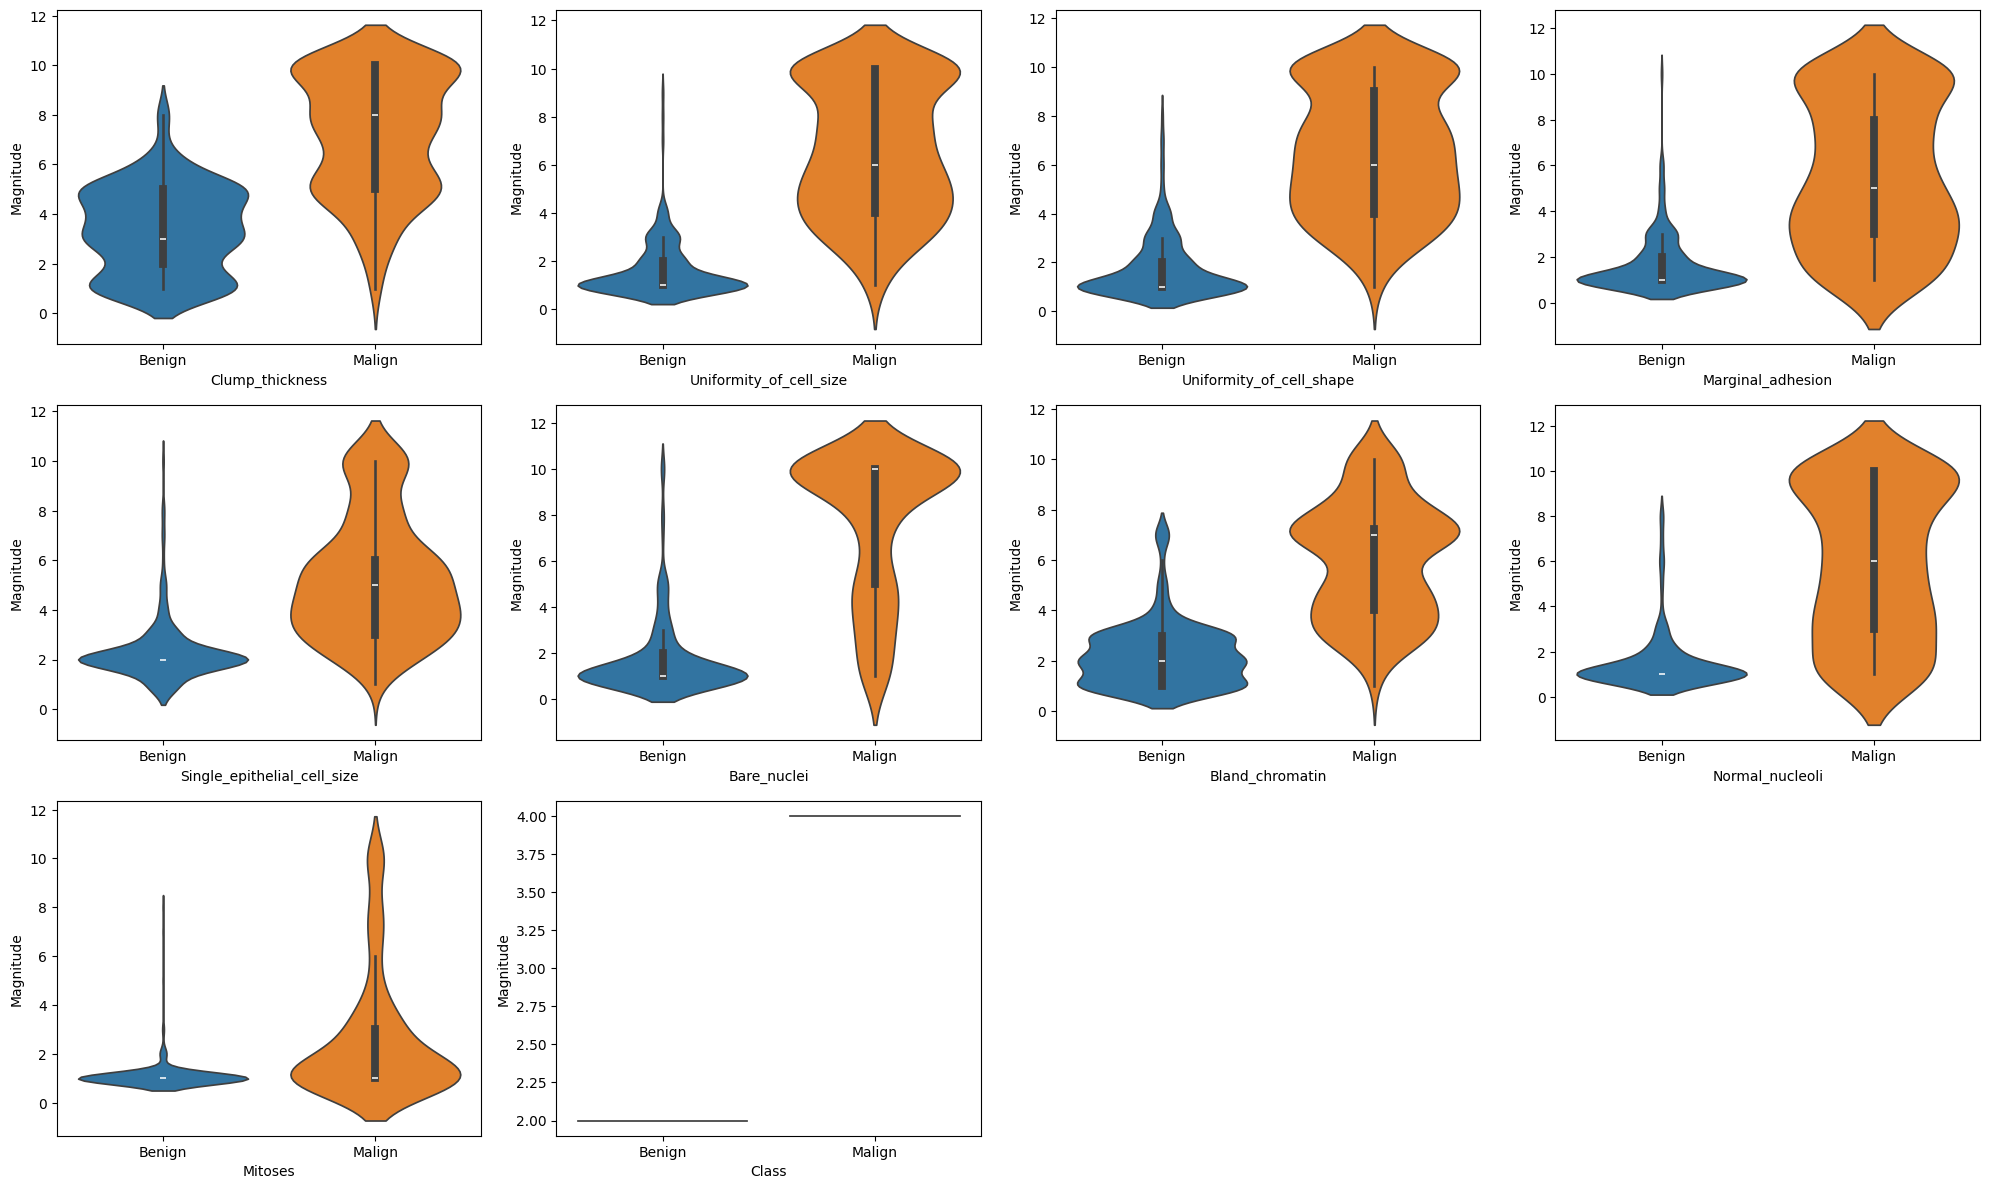

In [ ]:
feature_name_benign = list()
feature_data_benign = list()
#feature_name_malign = list()
feature_data_malign = list()
label = ["Benign", "Malign"]

for column_name,data in ds2_benign.iteritems():
  feature_name_benign.append(column_name)
  feature_data_benign.append(data)

for _,data in ds2_malign.iteritems():
  #feature_name_senior.append(column_name)
  feature_data_malign.append(data)

# calculate the column and row numbers
cols = 4  # 4 columns
rows = math.ceil(len(feature_name_benign) / cols)

# figure size setting
plt.figure(figsize=(20, 4 * rows))  # dynamic height

# iterate
for i, column_name in enumerate(feature_name_benign):
    plt.subplot(rows, cols, i + 1)  # subgraph creation
    sns.violinplot(data=[list(feature_data_benign[i]), list(feature_data_malign[i])])
    plt.xlabel(column_name)
    plt.ylabel("Magnitude")
    plt.xticks(ticks=[0, 1], labels=label)

# adjustment
plt.tight_layout()
plt.show()

In [ ]:
def find_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (data < lower_bound) | (data > upper_bound)

# Outlier description
outlier_counts_malign = ds2_malign.apply(find_outliers).sum()/len(ds2_malign)
outlier_counts_benign = ds2_benign.apply(find_outliers).sum()/len(ds2_benign)

print("Outlier description of malign: \n", outlier_counts_malign)
print("---")
print("Outlier description of benign: \n", outlier_counts_benign)
print("---")
print("Outlier proportion difference: \n", outlier_counts_malign - outlier_counts_benign)

Outlier description of malign: 
 Clump_thickness                0.000000
Uniformity_of_cell_size        0.000000
Uniformity_of_cell_shape       0.000000
Marginal_adhesion              0.000000
Single_epithelial_cell_size    0.000000
Bare_nuclei                    0.000000
Bland_chromatin                0.000000
Normal_nucleoli                0.000000
Mitoses                        0.122881
Class                          0.000000
dtype: float64
---
Outlier description of benign: 
 Clump_thickness                0.000000
Uniformity_of_cell_size        0.051643
Uniformity_of_cell_shape       0.089202
Marginal_adhesion              0.061033
Single_epithelial_cell_size    0.323944
Bare_nuclei                    0.098592
Bland_chromatin                0.028169
Normal_nucleoli                0.234742
Mitoses                        0.061033
Class                          0.000000
dtype: float64
---
Outlier proportion difference: 
 Clump_thickness                0.000000
Uniformity_of_cell_size

The result indicates that all features are significant in revealing the classification of the cancer. Thus, all features should be considered as allowed. This may also reduce the misclassification caused by the higher outlier-measured valatility in the benign class.

###### Mean and Volatility in Variance

In [ ]:
print("Mean of Malign - Description: ")
print(ds2_malign.describe().loc["mean"])
print("---")
print("Mean of Benign - Description: ")
print(ds2_benign.describe().loc["mean"])
print("---")
ds2_sqm_diff = (ds2_malign.describe().loc["mean"] - ds2_benign.describe().loc["mean"]).apply(lambda x : x**2)
print("Squared Difference of Means - Description: ")
print(ds2_sqm_diff)
print("---")
print(ds2_sqm_diff.rank(ascending = False))

Mean of Malign - Description: 
Clump_thickness                7.203390
Uniformity_of_cell_size        6.563559
Uniformity_of_cell_shape       6.538136
Marginal_adhesion              5.635593
Single_epithelial_cell_size    5.305085
Bare_nuclei                    7.605932
Bland_chromatin                5.978814
Normal_nucleoli                5.902542
Mitoses                        2.614407
Class                          4.000000
Name: mean, dtype: float64
---
Mean of Benign - Description: 
Clump_thickness                3.356808
Uniformity_of_cell_size        1.629108
Uniformity_of_cell_shape       1.765258
Marginal_adhesion              1.652582
Single_epithelial_cell_size    2.300469
Bare_nuclei                    1.704225
Bland_chromatin                2.230047
Normal_nucleoli                1.530516
Mitoses                        1.136150
Class                          2.000000
Name: mean, dtype: float64
---
Squared Difference of Means - Description: 
Clump_thickness                1

###### Further Analysis in the Dynamics between Features and Label

Clump_thickness                0.670230
Uniformity_of_cell_size        0.758697
Uniformity_of_cell_shape       0.759500
Marginal_adhesion              0.630415
Single_epithelial_cell_size    0.611432
Bare_nuclei                    0.760278
Bland_chromatin                0.706738
Normal_nucleoli                0.645257
Mitoses                        0.357184
Class                          1.000000
Name: Class, dtype: float64


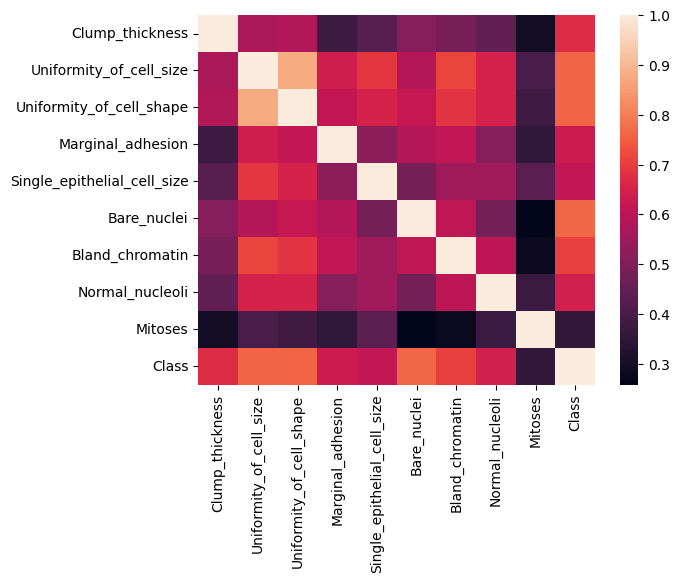

In [ ]:
sns.heatmap(ds2_df.corr())
print(ds2_df.corr()['Class'])

All features are considered to be put in use.

In [ ]:
ds2_df.to_csv('/content/gdrive/MyDrive/ASG1_COMP551/ds2/ds2.csv')

## Data Clean : Standardization?

The purpose to carry our standardization is mainly to get rid of the scaling error in some scaling-sensitive learning algorithms. However, we decide not to perform the standardization explicitly inhere. The reason is:

* Scaling effect mainly affects KNN but not DT, and we have already introduced Mahalanobis metric in KNN by default to measure the similarity that inherently annihilates the sclaing problem.

Thus, it may be redundant to do that in here. However, we should point out switching the metric in KNN definitely leads to the necessity of standardizing.


# Task 2 - KNN and DT Implementation

`ds1.csv` and `ds2.csv` are the datasets after cleaning.

### 2.0 Communal Functions

In [ ]:
def evaluate_acc(y_trainset, y_pred):
    accuracy = sum(y_trainset == y_pred) / len(y_trainset)
    return accuracy

## 2.1 KNN

In [ ]:
from scipy.spatial import KDTree
import numpy as np

euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return

    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self

    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        # self.x is in shape (100, 2), x_test is in shape (50, 2)
        # self.x[None, :, :] is in shape (1, 100, 2), and x_test[:,None,:] is in shape (50, 1, 2)
        # result: (x_test.shape[0], self.x.shape[0])
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            # print(i)
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # print(knns[i,:])
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

## 2.2 Weighted KNN with Mahalanobis Measure of Similarity

In here, considering the multivariation of our feature vector, covariation of the features and the precision, we decide to use Mahalanobis Metric to measure the cost and use weighted KNN in Gaussian weighting form.

Notice that since we have used Mahalanobis metric, the scaling problem originating from the volatility and dimension is inherently excluded. That's why in the data cleaning process, we did not perform the standardization.

In [ ]:
# for successful running, please excute the communal functions we defined above before
import numpy as np

# def of mahalanobis metric
def mahalanobis(x,y,cov_matrix):
  delta = x - y
  dist = np.sqrt(np.dot(delta.T, np.dot(np.linalg.inv(cov_matrix), delta)))
  return dist

class Weighted_KNN:
    def __init__(self, k=1, dist_fn=mahalanobis):
        self.k = k
        self.dist_fn = dist_fn
        self.x_train = None
        self.y_train = None
        return

    def fit(self, X, y):
        self.x_train = X
        self.y_train = y
        return self

    def gaussian_weight(self, distance, sigma=1.0):
        return np.exp(-0.5 * (distance / sigma) ** 2)

    def predict(self, x_test, sigma=1.0):
        num_test = x_test.shape[0]
        cov_matrix = np.cov(self.x_train, rowvar=False)
        y_prob = np.zeros((num_test, len(np.unique(self.y_train))))
        knns = np.zeros((num_test, self.k), dtype=int)

        for i in range(num_test):
            distances = np.array([self.dist_fn(x_test[i], self.x_train[j], cov_matrix) for j in range(self.x_train.shape[0])])
            knns[i, :] = np.argsort(distances)[:self.k]
            knn_distances = distances[knns[i, :]]
            knn_labels = self.y_train[knns[i, :]]

            weights = self.gaussian_weight(knn_distances, sigma)

            weighted_counts = np.zeros(len(np.unique(self.y_train)))
            for j in range(self.k):
                weighted_counts[knn_labels[j]] += weights[j]

            y_prob[i, :] = weighted_counts / np.sum(weights)

        return y_prob, knns

## 2.3 Decision Tree

The below code is referencing the code given at the course GitHub https://github.com/yueliyl/comp551-notebooks.


**Implement cost functions to evaluate the quality of a split**

In [ ]:
from math import log2

#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2



**Implement node class**

In [ ]:
import numpy as np

class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        self.cost = None                                    #the cost at this leaf
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent
            self.num_classes = parent.num_classes           #copies the num classes from the parent
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built


**implement decision tree**

In [ ]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            #compute the left and right cost based on the current split
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_gini_index, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination
        self.root = None                #stores the root of the decision tree
        self.cost_fn = cost_fn          #stores the cost function of the decision tree
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1
        #below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        num_data,num_feature = data.shape
        self.N = num_data
        #to recursively build the rest of the tree
        self._fit_tree(self.root)
        return self

    def _fit_tree(self, node):
        #This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        #greedily select the best test by minimizing the cost
        cost, split_feature, split_value = greedy_test(node, self.cost_fn)
        #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(cost):
            return
        #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
        #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices,split_feature] <= split_value
        #store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value
        node.cost = cost
        #define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        #recursive call to the _fit_tree()
        self._fit_tree(left)
        self._fit_tree(right)
        #assign the left and right child to present child
        node.left = left
        node.right = right

    def predict(self, data_test):
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
            class_probs[n,:] = node.class_prob
        return class_probs

    def _count_feature(self, feature_arr, node):
      if(node.split_feature is not None):
        feature_arr[node.split_feature] += 1
      if(node.left):
         feature_arr =  self._count_feature(feature_arr,node.left)
      if(node.right):
         feature_arr =  self._count_feature(feature_arr,node.right)
      return feature_arr

    def count_feature(self):
      _,num_feature = self.root.data.shape
      feature_arr = np.zeros(num_feature)
      return self._count_feature(feature_arr, self.root)

    def _count_feature_cost(self, feature_arr, node):
      if(node.split_feature is not None and node.left and node.right):
        this_data_num = node.data_indices.shape[0]
        left_data_num = node.left.data_indices.shape[0]
        right_data_num = node.right.data_indices.shape[0]
        N = self.N
        # print(f'{left_data_num},{right_data_num},{N},{node.cost}')
        feature_arr[node.split_feature] += (this_data_num)*node.cost/N - (left_data_num)*node.left.cost/N - (right_data_num)*node.right.cost/N

        feature_arr =  self._count_feature(feature_arr,node.left)
        feature_arr =  self._count_feature(feature_arr,node.right)
      return feature_arr

    def count_feature_cost(self):
      _,num_feature = self.root.data.shape
      feature_cost_arr = np.zeros(num_feature)
      return self._count_feature_cost(feature_cost_arr, self.root)

# Task 3 - Running Experiments for dataset 1(NHAMES)

In [ ]:
from sklearn.metrics import roc_curve, auc

### Read in data for KNN and DT

In [ ]:
# read cleaned data from csv and split to training/test set
NHANES_original_df = pd.read_csv('/content/gdrive/MyDrive/ASG1_COMP551/ds1/NHANES_age_prediction.csv')
NHANES_original_df['age_group']= NHANES_original_df['age_group'].map({'Adult': 1, 'Senior': 0})
NHANES_original_df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,1,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,1,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,1,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,1,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,1,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [ ]:
#split the dataset into train and test, the split is 80%/20%
y = NHANES_original_df[['age_group']].to_numpy()
y = y[:, 0]
x =  NHANES_original_df.drop('age_group', axis=1).drop('RIDAGEYR', axis=1).drop('SEQN', axis=1).to_numpy()
(N,D)= x.shape
inds = np.random.permutation(N)
num_in_training_set = np.around(N * 0.8).astype(int)
x_train, y_train = x[inds[:num_in_training_set]], y[inds[:num_in_training_set]]
x_test, y_test = x[inds[num_in_training_set:]], y[inds[num_in_training_set:]]

## Fit in KNN model
KNN_model = KNN(K=11)
KNN_y_prob, knns = KNN_model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', KNN_y_prob.shape)
#To get hard predictions by choosing the class with the maximum probability
KNN_y_pred = np.argmax(KNN_y_prob, axis=-1)
KNN_accuracy = np.sum(KNN_y_pred == y_test)/y_test.shape[0]
print(f'accuracy using KNN is {KNN_accuracy*100:.1f}.')
# to calculate AUC
KNN_fpr, KNN_tpr, thresholds = roc_curve(y_test, KNN_y_pred)
KNN_roc_auc = auc(KNN_fpr, KNN_tpr)
print("Area under the ROC Curve (AUROC) for KNN with k = 1:", KNN_roc_auc)


## Fit in DT model
tree = DecisionTree(max_depth=4, cost_fn=cost_gini_index)
DT_probs_test = tree.fit(x_train, y_train).predict(x_test)
DT_y_pred = np.argmax(DT_probs_test,1)
DT_accuracy = evaluate_acc(y_test, DT_y_pred)
print(f'accuracy using DT is {DT_accuracy*100:.1f}.')
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT_probs_test[:,1])
DT_roc_auc = auc(DT_fpr, DT_tpr)
print("Area under the ROC Curve (AUROC) for DT with depth = 2:", DT_roc_auc)

knns shape: (456, 11)
y_prob shape: (456, 2)
accuracy using KNN is 82.5.
Area under the ROC Curve (AUROC) for KNN with k = 1: 0.5457472105359429
accuracy using DT is 80.7.
Area under the ROC Curve (AUROC) for DT with depth = 2: 0.69449423815621


## How different K values affect accuracy in KNN

In [ ]:
def accuracy_under_multiple_K(dist, dist_name):
# initialize an array to hold triples like (k, train_accuracy, test_accuracy)
  K_values = [1,2,4,8,12,16,20]
  accuracy_for_Ks = [0,0,0];

  for k in K_values:
  ## Fit in KNN model
    KNN_model = KNN(K=k,dist_fn = dist).fit(x_train, y_train)
    train_prob,knns = KNN_model.predict(x_train)
    train_pred = np.argmax(train_prob, axis=-1)
    train_accuracy = np.sum(train_pred == y_train)/y_train.shape[0]
    # print(f'accuracy using K = {k} for training is {train_accuracy*100:.1f}.')
    test_prob,knns = KNN_model.predict(x_test)
    test_pred = np.argmax(test_prob, axis=-1)
    test_accuracy = np.sum(test_pred == y_test)/y_test.shape[0]
    # print(f'accuracy using K = {k} for testing is {test_accuracy*100:.1f}.')
    new_row = np.array([(k, train_accuracy, test_accuracy)])
    accuracy_for_Ks = np.vstack((accuracy_for_Ks, new_row))

  accuracy_for_Ks = accuracy_for_Ks[1:]
  # print(accuracy_for_Ks)

  # Plot how K influence the accuracy in one graph
  k = accuracy_for_Ks[:, 0]
  train_accuracy = accuracy_for_Ks[:, 1]
  test_accuracy = accuracy_for_Ks[:, 2]

  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(k, train_accuracy, label='Train Accuracy', marker='o')
  plt.plot(k, test_accuracy, label='Test Accuracy', marker='x')
  plt.xlabel('k')
  plt.ylabel('Accuracy')
  plt.title(f'NHAMES Dataset: k vs Train/Test Accuracy Under {dist_name} Distance')
  plt.legend()
  plt.grid(True)
  plt.show()

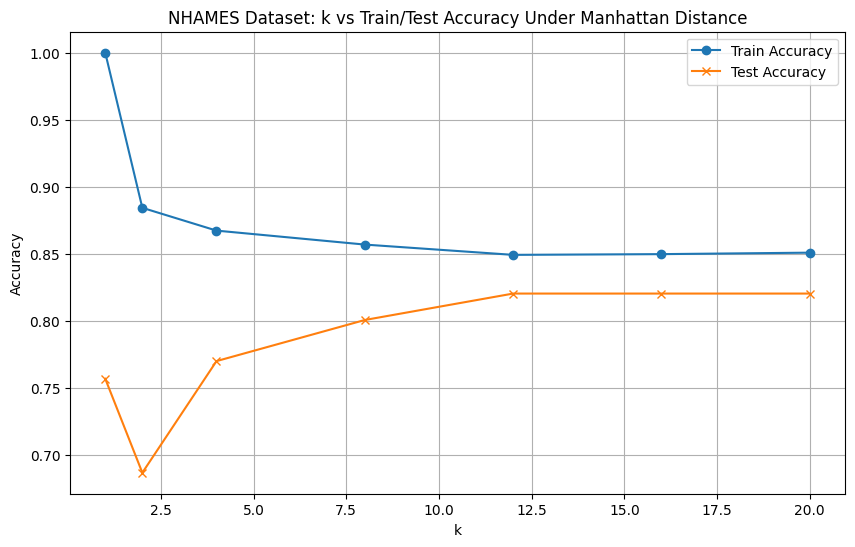

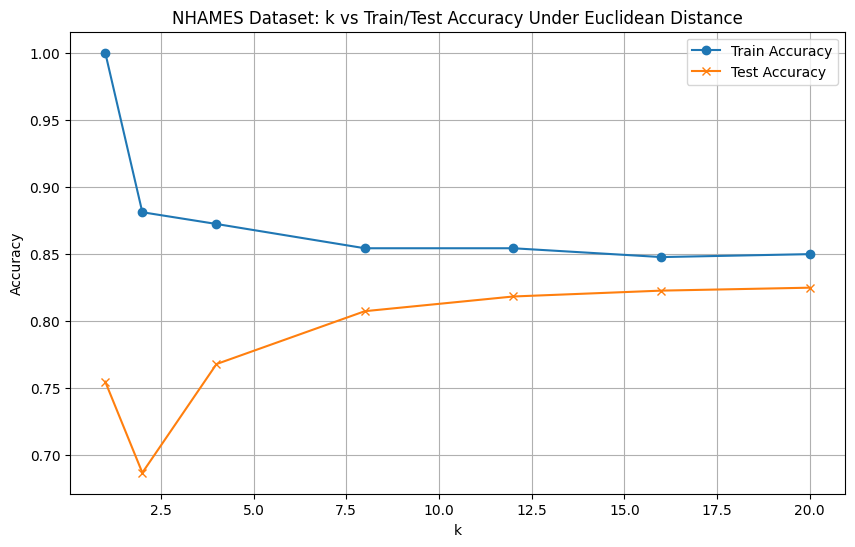

In [ ]:
accuracy_under_multiple_K(manhattan, "Manhattan");
accuracy_under_multiple_K(euclidean, "Euclidean");

## How different tree depths affect accuracy in DT

In [ ]:
def accuracy_under_multiple_loss_function(loss, loss_name):
  # initialize an array to hold triples like (k, train_accuracy, test_accuracy)
  depth_values = [1,2,4,8,12,16,20]
  accuracy_for_depths = [0,0,0];

  for depth in depth_values:
  ## Fit in KNN model
    DT_model = DecisionTree(max_depth=depth, cost_fn=loss).fit(x_train, y_train)
    train_prob = DT_model.predict(x_train)
    train_pred = np.argmax(train_prob, axis=-1)
    train_accuracy = np.sum(train_pred == y_train)/y_train.shape[0]
    # print(f'accuracy using depth = {depth} for training is {train_accuracy*100:.1f}.')
    test_prob = DT_model.predict(x_test)
    test_pred = np.argmax(test_prob, axis=-1)
    test_accuracy = np.sum(test_pred == y_test)/y_test.shape[0]
    #print(f'accuracy using depth = {depth} for testing is {test_accuracy*100:.1f}.')
    new_row = np.array([(depth, train_accuracy, test_accuracy)])
    accuracy_for_depths = np.vstack((accuracy_for_depths, new_row))

  accuracy_for_depths = accuracy_for_depths[1:]
  # print(accuracy_for_depths)

  # Plot how depth influence the accuracy in one graph
  depth = accuracy_for_depths[:, 0]
  train_accuracy = accuracy_for_depths[:, 1]
  test_accuracy = accuracy_for_depths[:, 2]

  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(depth, train_accuracy, label='Train Accuracy', marker='o')
  plt.plot(depth, test_accuracy, label='Test Accuracy', marker='x')
  plt.xlabel('depth')
  plt.ylabel('Accuracy')
  plt.title(f'NHAMES Dataset: depth vs Train/Test Accuracy Under {loss_name}')
  plt.legend()
  plt.grid(True)
  plt.show()

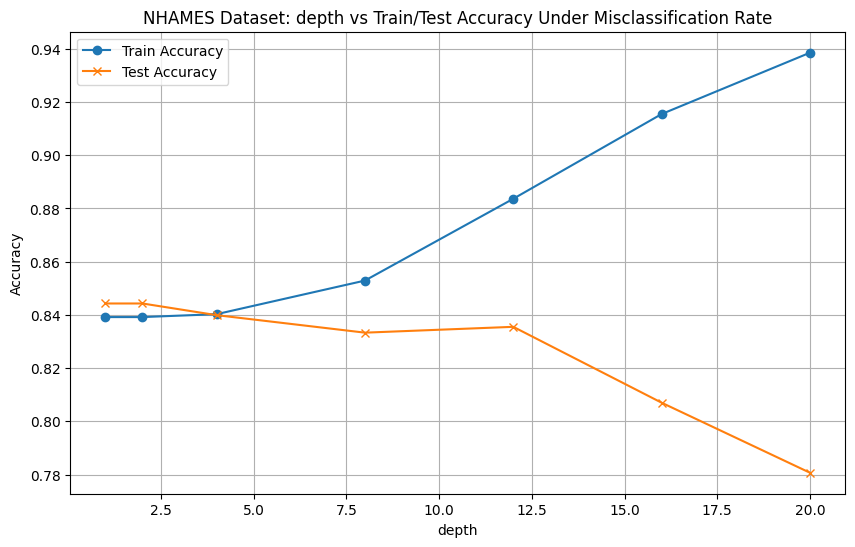

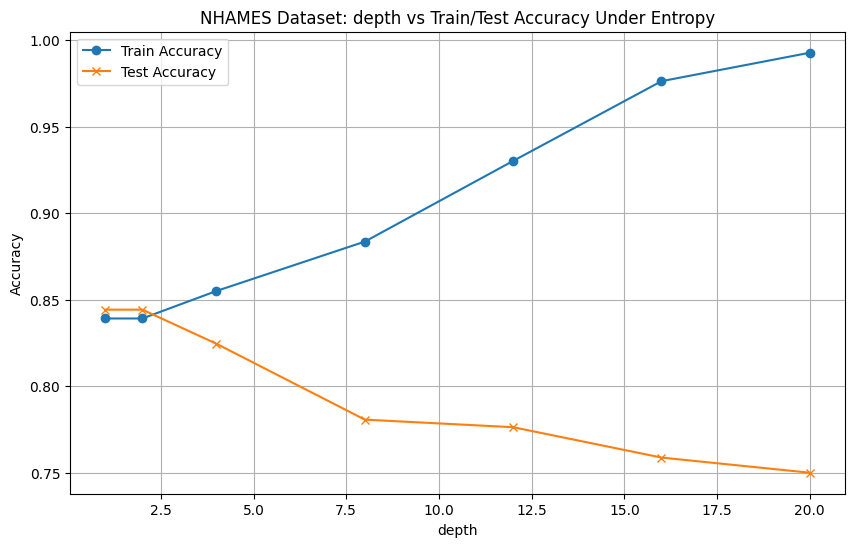

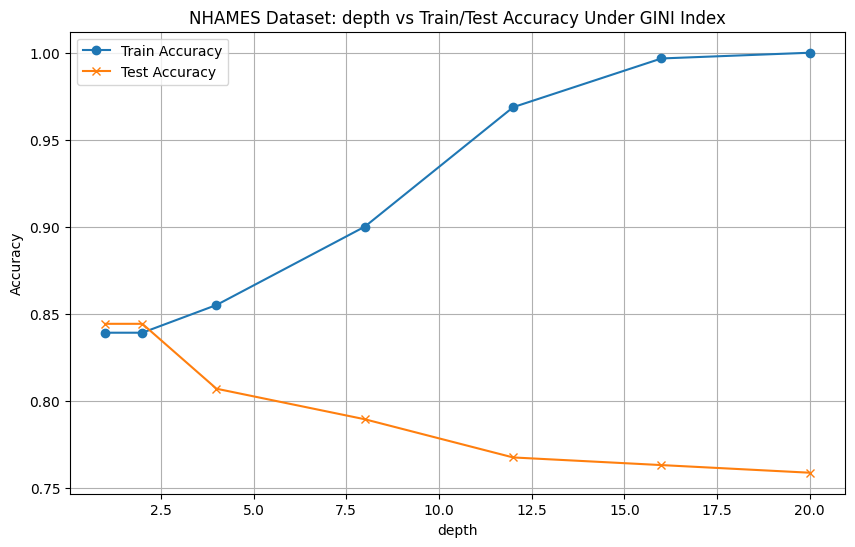

In [ ]:
accuracy_under_multiple_loss_function(cost_misclassification, "Misclassification Rate")
accuracy_under_multiple_loss_function(cost_entropy, "Entropy")
accuracy_under_multiple_loss_function(cost_gini_index, "GINI Index")

## Use validation set to find best K for KNN and depth for DT

best K = 17


Text(0.5, 1.0, 'NHAMES Dataset: K vs Validation AOC')

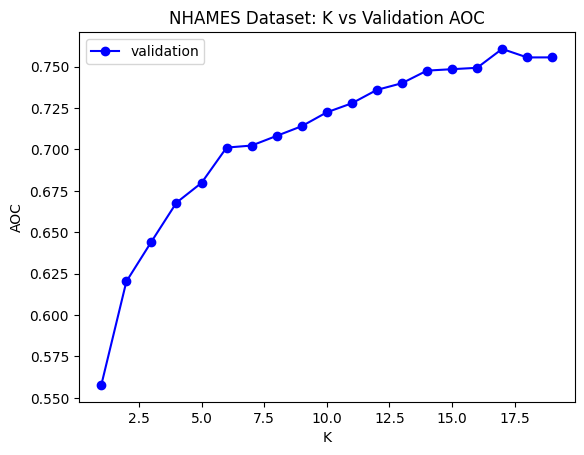

In [ ]:
# We split 60% of training data into validation set
# First find best K for KNN
num_in_validation_set = np.around(num_in_training_set * 0.4).astype(int)
x_train_tr, y_train_tr = x_train[:num_in_validation_set], y_train[:num_in_validation_set]
x_train_va, y_train_va = x_train[num_in_validation_set:], y_train[num_in_validation_set:]

model_choices=[]
valid_metric = []

n_valid = y_train_va.shape[0]

for k in range(1,20):
    knn = KNN(K=k)
    y_train_va_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va)/n_valid
    KNN_fpr, KNN_tpr, thresholds = roc_curve(y_train_va, y_train_va_prob[:,1])
    KNN_roc_auc = auc(KNN_fpr, KNN_tpr)
    model_choices.append(k)
    valid_metric.append(KNN_roc_auc)

# use the best K to predict test data
best_valid_K = model_choices[valid_metric.index(max(valid_metric))]
print(f'best K = {best_valid_K}')

plt.plot(model_choices, valid_metric, marker='o', color='blue', label='validation')
plt.xlabel("K")
plt.ylabel("AOC")
plt.legend(loc='best')
plt.title(f'NHAMES Dataset: K vs Validation AOC')

best depth = 5


Text(0.5, 1.0, 'NHAMES Dataset: Depth vs Validation AOC')

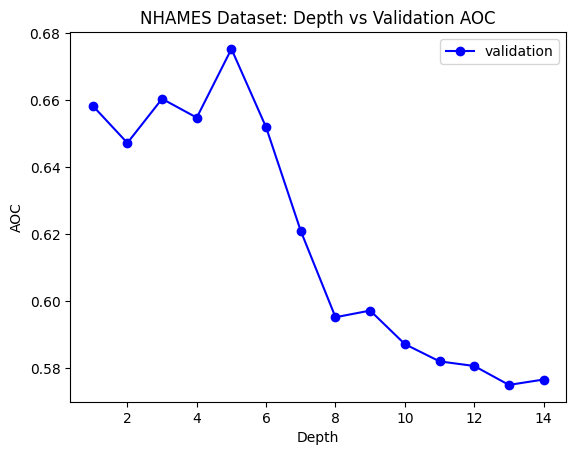

In [ ]:
# Then find best depth for DT using same split

model_choices=[]
valid_metric = []

n_valid = y_train_va.shape[0]

for depth in range(1,15):
    tree = DecisionTree(max_depth=depth)
    y_train_va_prob = tree.fit(x_train_tr, y_train_tr).predict(x_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va)/n_valid
    tree_fpr, tree_tpr, thresholds = roc_curve(y_train_va, y_train_va_prob[:,1])
    tree_roc_auc = auc(tree_fpr, tree_tpr)
    model_choices.append(depth)
    valid_metric.append(tree_roc_auc)

# use the best K to predict test data
best_valid_depth = model_choices[valid_metric.index(max(valid_metric))]
print(f'best depth = {best_valid_depth}')

plt.plot(model_choices, valid_metric, marker='o', color='blue', label='validation')
plt.xlabel("Depth")
plt.ylabel("AOC")
plt.legend(loc='best')
plt.title(f'NHAMES Dataset: Depth vs Validation AOC')

Thus for the following sessions, we will use the best K and depth for model evaluation, which is 15 and 1 respectively.

## Plot the ROC for KNN and DT

In [ ]:
best_knn = KNN(K=best_valid_depth).fit(x_train_tr, y_train_tr)
best_KNN_y_prob,_ = best_knn.predict(x_test)
best_KNN_y_pred = np.argmax(best_KNN_y_prob, axis=-1)
best_KNN_fpr, best_KNN_tpr, thresholds = roc_curve(y_test, best_KNN_y_pred)
best_KNN_roc_auc = auc(best_KNN_fpr, best_KNN_tpr)

best_tree = DecisionTree(max_depth=best_valid_depth).fit(x_train_tr, y_train_tr)
best_tree_y_prob = best_tree.predict(x_test)
best_tree_y_pred = np.argmax(best_tree_y_prob, axis=-1)
best_tree_fpr, best_tree_tpr, thresholds = roc_curve(y_test, best_tree_y_prob[:,1])
best_tree_roc_auc = auc(best_tree_fpr, best_tree_tpr)

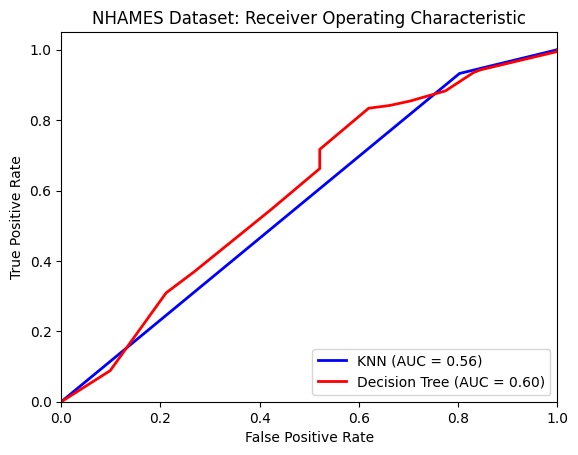

In [ ]:
plt.figure()
plt.plot(best_KNN_fpr, best_KNN_tpr, color='blue', lw=2, label=f'KNN (AUC = {best_KNN_roc_auc:.2f})')
plt.plot(best_tree_fpr, best_tree_tpr, color='red', lw=2, label=f'Decision Tree (AUC = {best_tree_roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NHAMES Dataset: Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Feature Importance in DT

In [ ]:
# First, the easy way of calculatin feature importance, namely counting the number of non-leaf nodes where feature d is used
feature_count = best_tree.count_feature()
gini = best_tree.count_feature_cost()
print(gini)
print(feature_count)

[3.         2.         8.         4.         0.         5.11503949
 4.        ]
[3. 2. 8. 4. 0. 6. 4.]


## Weighted KNN Experiment


**Remark:**

Here we need to remind that this version of KNN involve matrix inversion inducing a high complexity since we are using Mahalanobis metric with var-cov matrix. Therefore, for your convenience, we include our testing result as a screenshot attached below as a reference.

best K = 18


Text(0.5, 1.0, 'NHAMES Dataset: K vs Validation Accuracy with Weighted KNN')

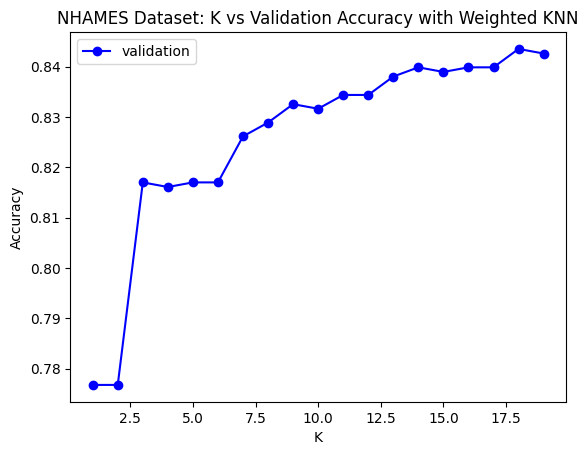

In [ ]:
model_choices=[]
valid_metric = []

n_valid = y_train_va.shape[0]

for k in range(1,5):
    knn = Weighted_KNN(k=k)
    y_train_va_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va)/n_valid
    KNN_fpr, KNN_tpr, thresholds = roc_curve(y_train_va, y_train_va_prob[:,1])
    KNN_roc_auc = auc(KNN_fpr, KNN_tpr)
    model_choices.append(k)
    valid_metric.append(accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_metric.index(max(valid_metric))]
print(f'best K = {best_valid_K}')

plt.plot(model_choices, valid_metric, marker='o', color='blue', label='validation')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title(f'NHAMES Dataset: K vs Validation Accuracy with Weighted KNN')

Since the calculation for mahalanobis function needs a fairly long time to finish, we set the range for K up to 5 as an example. However we tested up to 20 and the screenshot is attached for your reference


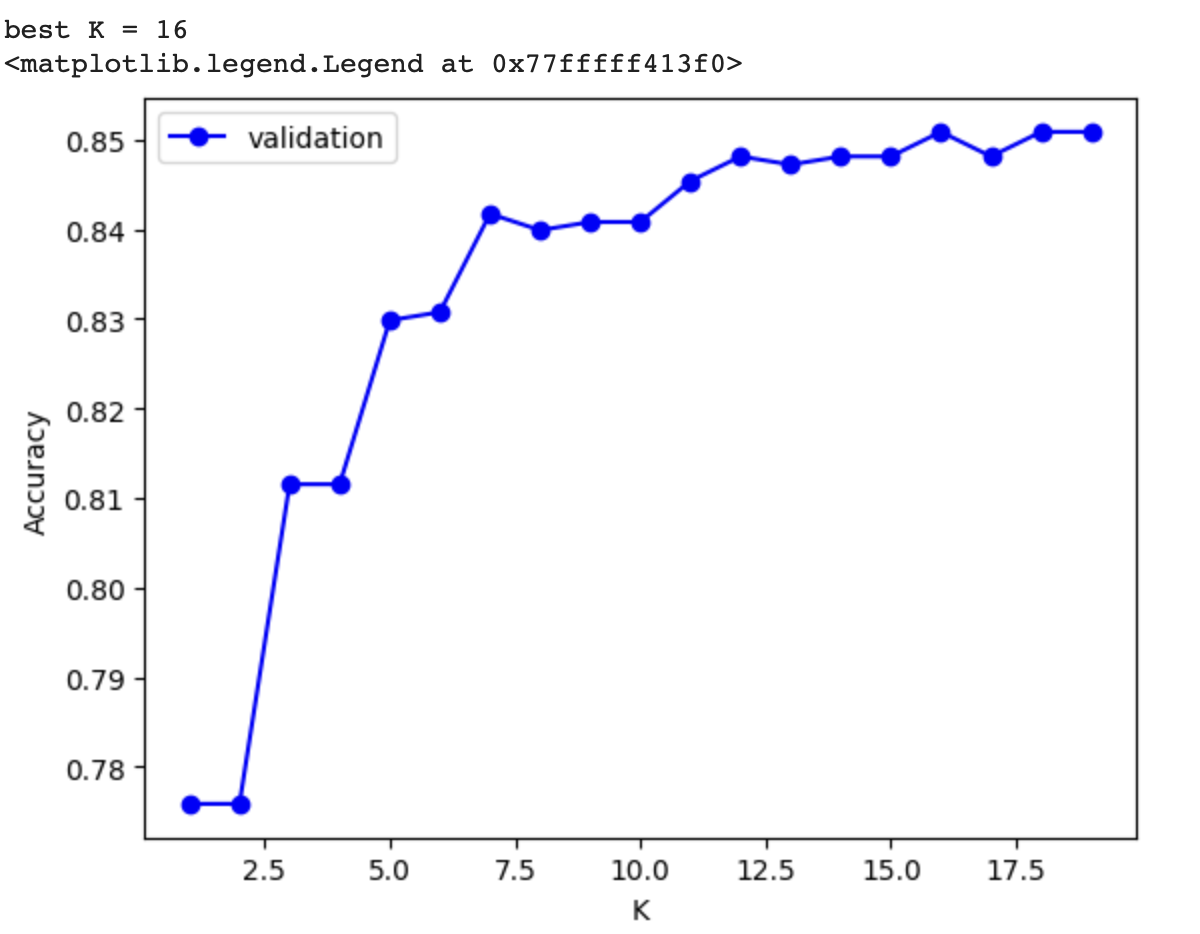

# Task 3 - Running Experiments for Dataset2 (Cancer)

In [ ]:
from sklearn.metrics import roc_curve, auc

### Read in data for KNN and DT

In [ ]:
# read cleaned data from csv and split to training/test set
cancer_original_df = pd.read_csv('/content/gdrive/MyDrive/ASG1_COMP551/ds2/ds2.csv')
cancer_original_df['Class']= cancer_original_df['Class'].map({4: 1, 2: 0})
cancer_original_df.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [ ]:
#split the dataset into train and test, the split is 80%/20%
y = cancer_original_df[['Class']].to_numpy()
y = y[:, 0]
x =  cancer_original_df.drop('Class', axis=1).drop('Sample_code_number', axis=1).to_numpy()
(N,D)= x.shape
inds = np.random.permutation(N)
num_in_training_set = np.around(N * 0.8).astype(int)
x_train, y_train = x[inds[:num_in_training_set]], y[inds[:num_in_training_set]]
x_test, y_test = x[inds[num_in_training_set:]], y[inds[num_in_training_set:]]

## Fit in KNN model
KNN_model = KNN(K=1)
KNN_y_prob, knns = KNN_model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', KNN_y_prob.shape)
#To get hard predictions by choosing the class with the maximum probability
KNN_y_pred = np.argmax(KNN_y_prob, axis=-1)
KNN_accuracy = np.sum(KNN_y_pred == y_test)/y_test.shape[0]
print(f'accuracy using KNN is {KNN_accuracy*100:.1f}.')
# to calculate AUC
KNN_fpr, KNN_tpr, thresholds = roc_curve(y_test, KNN_y_pred)
KNN_roc_auc = auc(KNN_fpr, KNN_tpr)
print("Area under the ROC Curve (AUROC) for KNN with k = 1:", KNN_roc_auc)


## Fit in DT model
tree = DecisionTree(max_depth=4, cost_fn=cost_gini_index)
DT_probs_test = tree.fit(x_train, y_train).predict(x_test)
DT_y_pred = np.argmax(DT_probs_test,1)
DT_accuracy = evaluate_acc(y_test, DT_y_pred)
print(f'accuracy using DT is {DT_accuracy*100:.1f}.')
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT_probs_test[:,1])
DT_roc_auc = auc(DT_fpr, DT_tpr)
print("Area under the ROC Curve (AUROC) for DT with depth = 2:", DT_roc_auc)

knns shape: (90, 1)
y_prob shape: (90, 2)
accuracy using KNN is 93.3.
Area under the ROC Curve (AUROC) for KNN with k = 1: 0.9387755102040816
accuracy using DT is 91.1.
Area under the ROC Curve (AUROC) for DT with depth = 2: 0.8795420607267298


## How different K values affect accuracy in KNN

In [ ]:
def accuracy_under_multiple_K(dist, dist_name):
# initialize an array to hold triples like (k, train_accuracy, test_accuracy)
  K_values = [1,2,4,8,12,16,20]
  accuracy_for_Ks = [0,0,0];

  for k in K_values:
  ## Fit in KNN model
    KNN_model = KNN(K=k,dist_fn = dist).fit(x_train, y_train)
    train_prob,knns = KNN_model.predict(x_train)
    train_pred = np.argmax(train_prob, axis=-1)
    train_accuracy = np.sum(train_pred == y_train)/y_train.shape[0]
    # print(f'accuracy using K = {k} for training is {train_accuracy*100:.1f}.')
    test_prob,knns = KNN_model.predict(x_test)
    test_pred = np.argmax(test_prob, axis=-1)
    test_accuracy = np.sum(test_pred == y_test)/y_test.shape[0]
    # print(f'accuracy using K = {k} for testing is {test_accuracy*100:.1f}.')
    new_row = np.array([(k, train_accuracy, test_accuracy)])
    accuracy_for_Ks = np.vstack((accuracy_for_Ks, new_row))

  accuracy_for_Ks = accuracy_for_Ks[1:]
  # print(accuracy_for_Ks)

  # Plot how K influence the accuracy in one graph
  k = accuracy_for_Ks[:, 0]
  train_accuracy = accuracy_for_Ks[:, 1]
  test_accuracy = accuracy_for_Ks[:, 2]

  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(k, train_accuracy, label='Train Accuracy', marker='o')
  plt.plot(k, test_accuracy, label='Test Accuracy', marker='x')
  plt.xlabel('k')
  plt.ylabel('Accuracy')
  plt.title(f'Cancer Dataset: k vs Train/Test Accuracy Under {dist_name} Distance')
  plt.legend()
  plt.grid(True)
  plt.show()

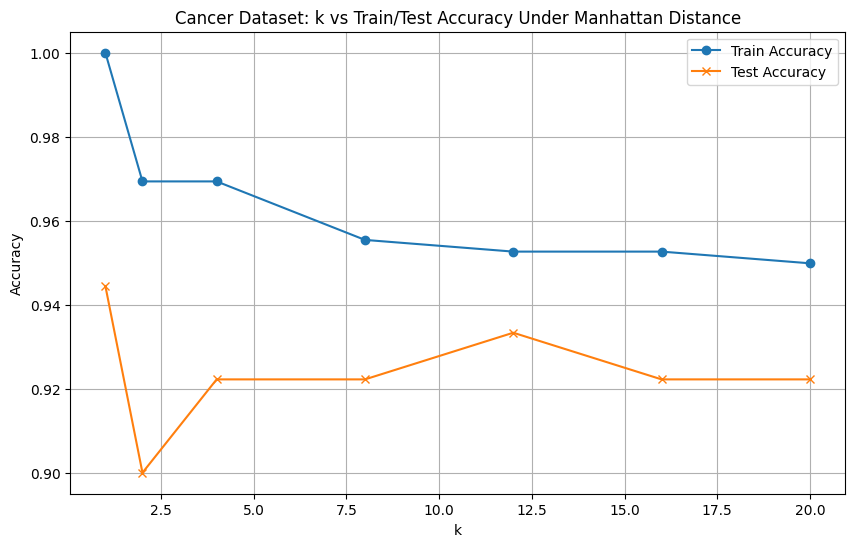

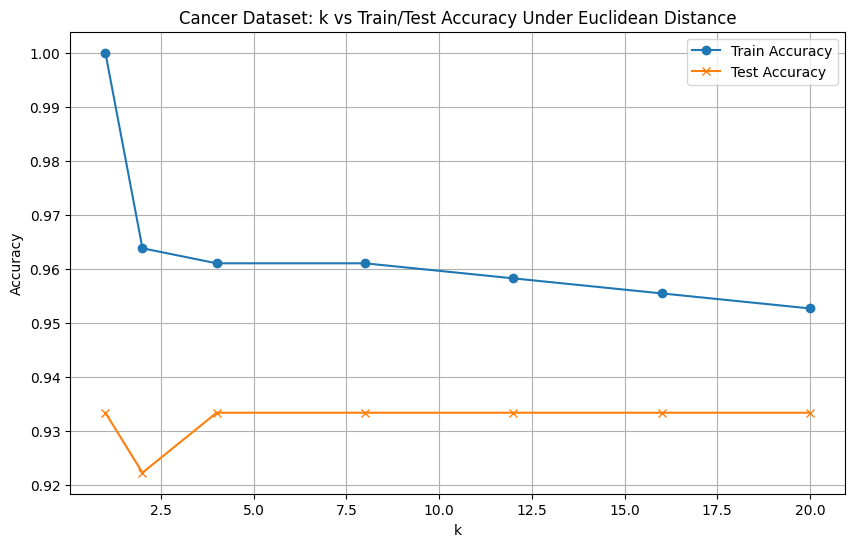

In [ ]:
accuracy_under_multiple_K(manhattan, "Manhattan");
accuracy_under_multiple_K(euclidean, "Euclidean");

## How different tree depths affect accuracy in DT

In [ ]:
def accuracy_under_multiple_loss_function(loss, loss_name):
  # initialize an array to hold triples like (k, train_accuracy, test_accuracy)
  depth_values = [1,2,4,8,12,16,20]
  accuracy_for_depths = [0,0,0];

  for depth in depth_values:
  ## Fit in KNN model
    DT_model = DecisionTree(max_depth=depth, cost_fn=loss).fit(x_train, y_train)
    train_prob = DT_model.predict(x_train)
    train_pred = np.argmax(train_prob, axis=-1)
    train_accuracy = np.sum(train_pred == y_train)/y_train.shape[0]
    # print(f'accuracy using depth = {depth} for training is {train_accuracy*100:.1f}.')
    test_prob = DT_model.predict(x_test)
    test_pred = np.argmax(test_prob, axis=-1)
    test_accuracy = np.sum(test_pred == y_test)/y_test.shape[0]
    #print(f'accuracy using depth = {depth} for testing is {test_accuracy*100:.1f}.')
    new_row = np.array([(depth, train_accuracy, test_accuracy)])
    accuracy_for_depths = np.vstack((accuracy_for_depths, new_row))

  accuracy_for_depths = accuracy_for_depths[1:]
  # print(accuracy_for_depths)

  # Plot how depth influence the accuracy in one graph
  depth = accuracy_for_depths[:, 0]
  train_accuracy = accuracy_for_depths[:, 1]
  test_accuracy = accuracy_for_depths[:, 2]

  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(depth, train_accuracy, label='Train Accuracy', marker='o')
  plt.plot(depth, test_accuracy, label='Test Accuracy', marker='x')
  plt.xlabel('depth')
  plt.ylabel('Accuracy')
  plt.title(f'Cancer Dataset: depth vs Train/Test Accuracy Under {loss_name}')
  plt.legend()
  plt.grid(True)
  plt.show()

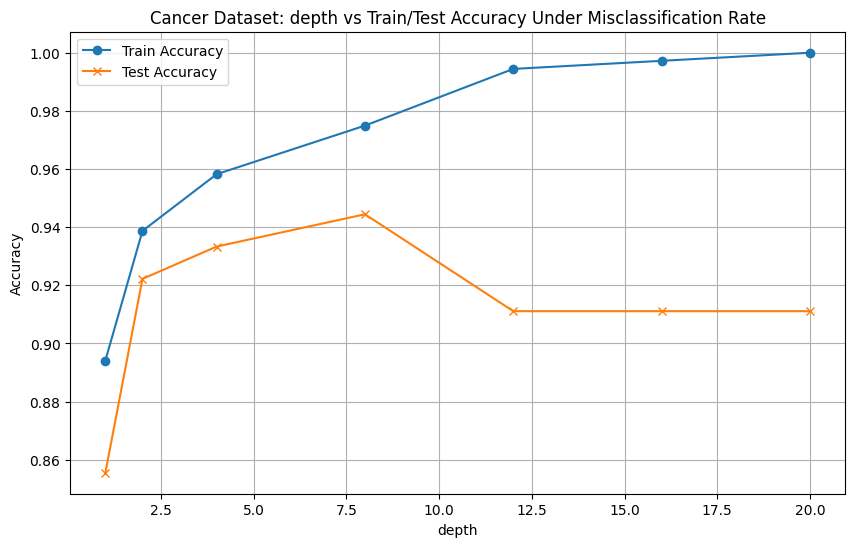

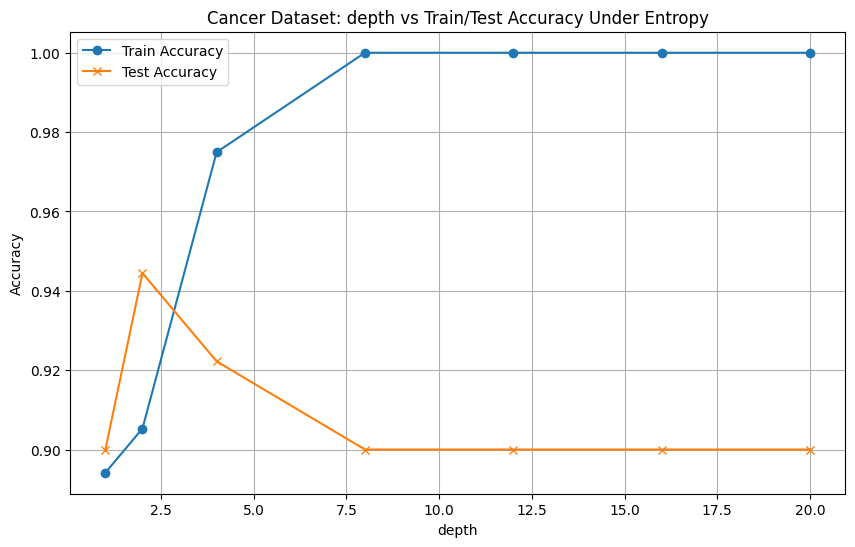

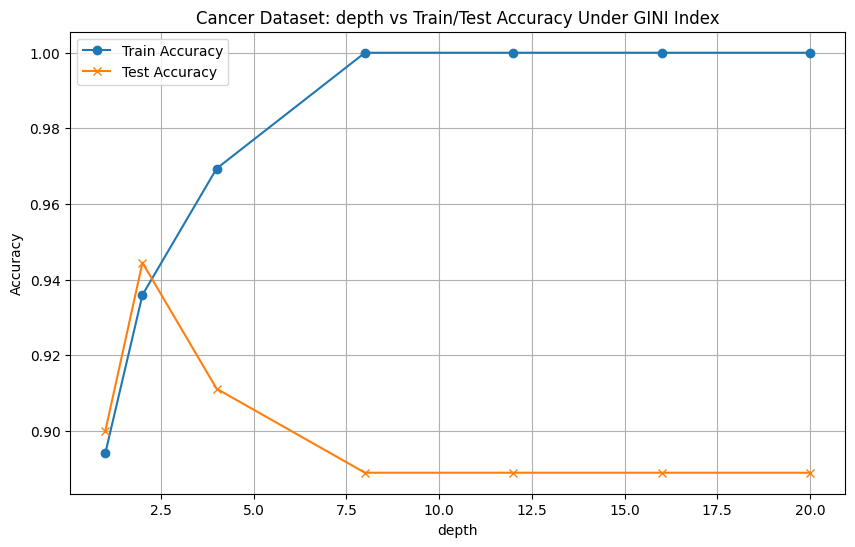

In [ ]:
accuracy_under_multiple_loss_function(cost_misclassification, "Misclassification Rate")
accuracy_under_multiple_loss_function(cost_entropy, "Entropy")
accuracy_under_multiple_loss_function(cost_gini_index, "GINI Index")

## Use validation set to find best K for KNN and depth for DT

best K = 5


Text(0.5, 1.0, 'Cancer Dataset: K vs Validation Accuracy')

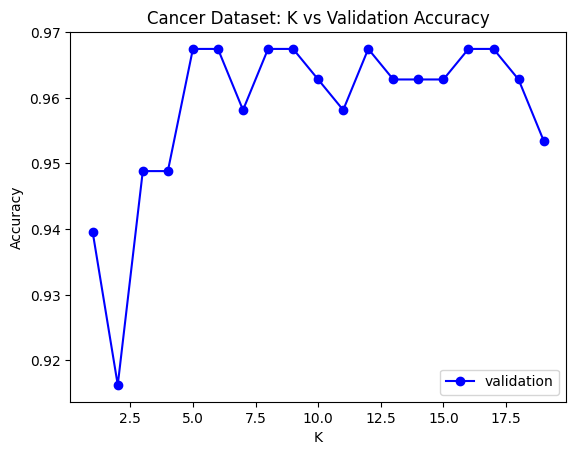

In [ ]:
# We split 60% of training data into validation set
# First find best K for KNN
num_in_validation_set = np.around(num_in_training_set * 0.4).astype(int)
x_train_tr, y_train_tr = x_train[:num_in_validation_set], y_train[:num_in_validation_set]
x_train_va, y_train_va = x_train[num_in_validation_set:], y_train[num_in_validation_set:]

model_choices=[]
valid_metric = []

n_valid = y_train_va.shape[0]

for k in range(1,20):
    knn = KNN(K=k)
    y_train_va_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va)/n_valid
    KNN_fpr, KNN_tpr, thresholds = roc_curve(y_train_va, y_train_va_prob[:,1])
    KNN_roc_auc = auc(KNN_fpr, KNN_tpr)
    model_choices.append(k)
    valid_metric.append(accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_metric.index(max(valid_metric))]
print(f'best K = {best_valid_K}')

plt.plot(model_choices, valid_metric, marker='o', color='blue', label='validation')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title(f'Cancer Dataset: K vs Validation Accuracy')

best depth = 6


Text(0.5, 1.0, 'Cancer Dataset: Depth vs Validation Accuracy')

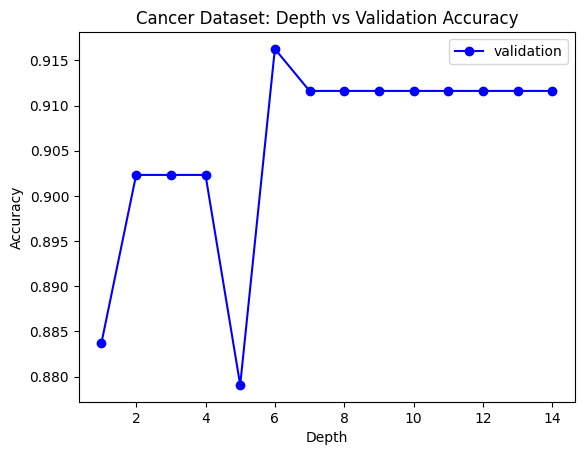

In [ ]:
# Then find best depth for DT using same split

model_choices=[]
valid_metric = []

n_valid = y_train_va.shape[0]

for depth in range(1,15):
    tree = DecisionTree(max_depth=depth)
    y_train_va_prob = tree.fit(x_train_tr, y_train_tr).predict(x_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va)/n_valid
    tree_fpr, tree_tpr, thresholds = roc_curve(y_train_va, y_train_va_prob[:,1])
    tree_roc_auc = auc(tree_fpr, tree_tpr)
    model_choices.append(depth)
    valid_metric.append(accuracy)

# use the best K to predict test data
best_valid_depth = model_choices[valid_metric.index(max(valid_metric))]
print(f'best depth = {best_valid_depth}')

plt.plot(model_choices, valid_metric, marker='o', color='blue', label='validation')
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title(f'Cancer Dataset: Depth vs Validation Accuracy')

## Plot the ROC for KNN and DT

In [ ]:
best_knn = KNN(K=best_valid_depth).fit(x_train_tr, y_train_tr)
best_KNN_y_prob,_ = best_knn.predict(x_test)
best_KNN_y_pred = np.argmax(best_KNN_y_prob, axis=-1)
best_KNN_fpr, best_KNN_tpr, thresholds = roc_curve(y_test, best_KNN_y_pred)
best_KNN_roc_auc = auc(best_KNN_fpr, best_KNN_tpr)

best_tree = DecisionTree(max_depth=best_valid_depth).fit(x_train_tr, y_train_tr)
best_tree_y_prob = best_tree.predict(x_test)
best_tree_y_pred = np.argmax(best_tree_y_prob, axis=-1)
best_tree_fpr, best_tree_tpr, thresholds = roc_curve(y_test, best_tree_y_prob[:,1])
best_tree_roc_auc = auc(best_tree_fpr, best_tree_tpr)

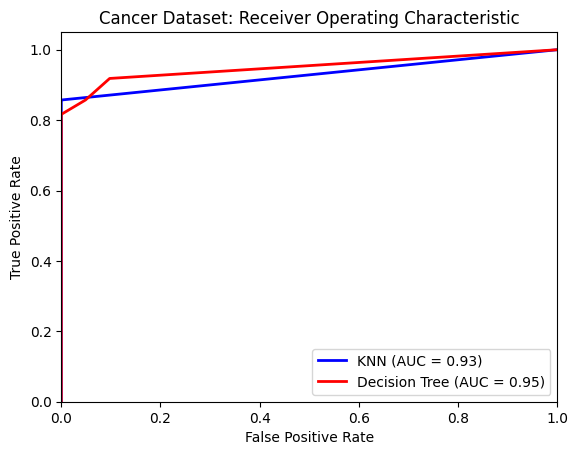

In [ ]:
plt.figure()
plt.plot(best_KNN_fpr, best_KNN_tpr, color='blue', lw=2, label=f'KNN (AUC = {best_KNN_roc_auc:.2f})')
plt.plot(best_tree_fpr, best_tree_tpr, color='red', lw=2, label=f'Decision Tree (AUC = {best_tree_roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cancer Dataset: Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Feature Importance in DT

In [ ]:
# First, the easy way of calculatin feature importance, namely counting the number of non-leaf nodes where feature d is used
feature_count = best_tree.count_feature()
gini = best_tree.count_feature_cost()
print(gini)
print(feature_count)

[4.         3.         0.12353151 0.         0.         0.
 3.         0.         0.        ]
[4. 3. 1. 0. 0. 0. 3. 0. 0.]


## Weighted KNN Experiment


best K = 1


Text(0.5, 1.0, 'Cancer Dataset: K vs Accuracy With Weighted KNN ')

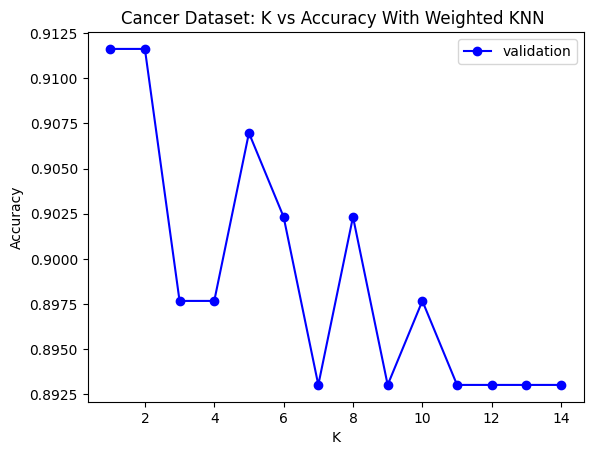

In [ ]:
model_choices=[]
valid_metric = []

n_valid = y_train_va.shape[0]

for k in range(1,15):
    knn = Weighted_KNN(k=k)
    y_train_va_prob,_ = knn.fit(x_train_tr, y_train_tr).predict(x_train_va)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    accuracy = np.sum(y_train_va_pred == y_train_va)/n_valid
    KNN_fpr, KNN_tpr, thresholds = roc_curve(y_train_va, y_train_va_prob[:,1])
    KNN_roc_auc = auc(KNN_fpr, KNN_tpr)
    model_choices.append(k)
    valid_metric.append(accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_metric.index(max(valid_metric))]
print(f'best K = {best_valid_K}')

plt.plot(model_choices, valid_metric, marker='o', color='blue', label='validation')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title(f'Cancer Dataset: K vs Accuracy With Weighted KNN ')